# Исследование данных интернет-магазина «Стримчик»

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Инструкция по выполнению проекта ##

### Шаг 1. Откройте файл с данными и изучите общую информацию ###

Путь к файлу: /datasets/games.csv.

### Шаг 2. Подготовьте данные ###

 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - Обработайте пропуски при необходимости:
   - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
   - Опишите причины, которые могли привести к пропускам;
   - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
 
### Шаг 3. Проведите исследовательский анализ данных ###

 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий **актуальный период**. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за **предыдущие годы**.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
 
### Шаг 4. Составьте портрет пользователя каждого региона ###

Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 
### Шаг 5. Проверьте гипотезы ###

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 
Задайте самостоятельно пороговое значение alpha.

Поясните:

 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.
 
### Шаг 6. Напишите общий вывод ###

**Оформление**: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

## Описание данных ##

 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
Данные за 2016 год могут быть неполными.

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**: В датасете 16715 строк. В некоторых столбцах имеется неверный тип данных.

#### Шаг 2. Подготовка данных

 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - Обработайте пропуски при необходимости:
   - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
   - Опишите причины, которые могли привести к пропускам;
   - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [4]:
df.columns = df.columns.str.lower() # Приводим название столбцов к нижнему регистру

In [5]:
df.isna().sum() # Проверяем наличие пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm') # Уточняем % соотношение пропусков

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


In [7]:
df.duplicated().sum() # Проверяем наличие явных дубликатов

0

In [8]:
df[['name', 'platform', 'year_of_release']].duplicated().sum()

2

In [9]:
df[['name', 'platform', 'year_of_release']].drop_duplicates()

,name,platform,year_of_release
0,Wii Sports,Wii,2006.0
1,Super Mario Bros.,NES,1985.0
2,Mario Kart Wii,Wii,2008.0
3,Wii Sports Resort,Wii,2009.0
4,Pokemon Red/Pokemon Blue,GB,1996.0
...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0
16711,LMA Manager 2007,X360,2006.0
16712,Haitaka no Psychedelica,PSV,2016.0
16713,Spirits & Spells,GBA,2003.0


In [10]:
df[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [11]:
df.drop_duplicates(['name', 'platform', 'year_of_release'], inplace=True)

In [12]:
df.dropna(subset=['year_of_release'], inplace=True) # Удаляем пропуски, т.к. их всего 1,6%

In [13]:
df.replace('tbd', np.nan, inplace=True) # Заменяем значение 'tbd' на пропуски, для возможности дальнейшего анализа

In [14]:
df['year_of_release'] = df['year_of_release'].astype(int) # Меняем тип данных на целочислительный
df['user_score'] = df['user_score'].astype(float) # Меняем тип данных на вещественный

In [15]:
# Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

**Выводы**

1. Приведены названия столбцов к нижнему регистру. 
2. Преобразованы данные в столбце year_of_release, в нужный тип, т.к. год не может выражаться в виде вещественного числа.
3. Удалены те строки, в которых имелись пропущенные значения в столбце year_of_release. Это было допустимо, т.к. процентное соотношение пропущенных значений в этом столбце составляло всего 1,6%.
4. В столбце user_score тип данных не был изменён, т.к. было бы неправильным удалить 40% пропущенных значений. Заполнения пропущенных значений не было, т.к. в этом не было необходимости.
5. Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.
6. Заменяем значение 'tbd' на пропуски, для возможности дальнейшего анализа.

Пропуски могли появиться, потому что:

1. Некоторые данные могли быть просто не заполнены.
2. Ошибки или проблемы в сборе или записи данных могли привести к пропускам информации.

#### Шаг 3. Исследовательский анализ данных

 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий **актуальный период**. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за **предыдущие годы**.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

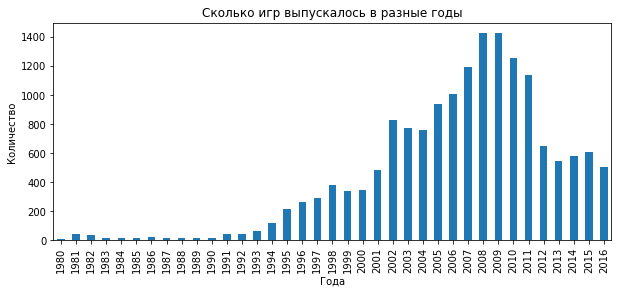

In [17]:
df['year_of_release'].value_counts().sort_index().plot.bar(figsize=(10, 4))
plt.title('Cколько игр выпускалось в разные годы')
plt.xlabel('Года')
plt.ylabel('Количество')
plt.show()

Не все периоды важны, т.к. рост начался только с 1991 г.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [18]:
df.groupby('platform')['sum_sales'].sum().sort_values() # Выводим общую сумму продаж по каждой платформе

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       30.74
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.33
X360     961.24
PS2     1233.56
Name: sum_sales, dtype: float64

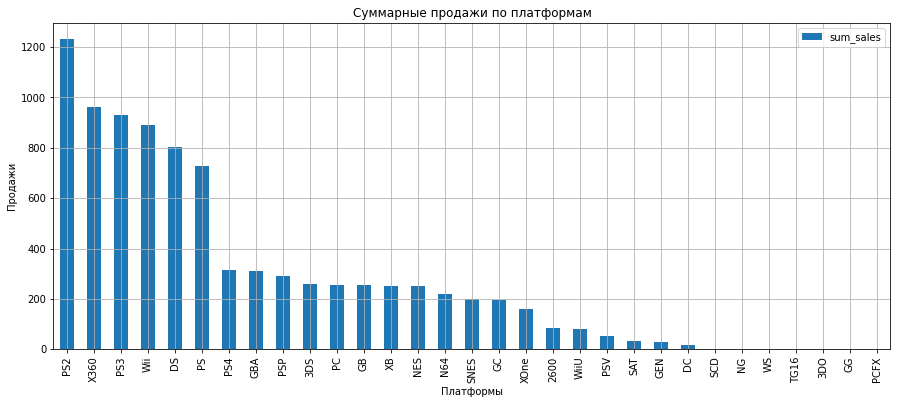

In [19]:
df.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).plot.bar(grid=True, figsize=(15, 6))
plt.title('Суммарные продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

In [20]:
df.loc[(df['year_of_release'] == 1985) & (df['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [21]:
df.loc[15957, 'year_of_release'] = 2010

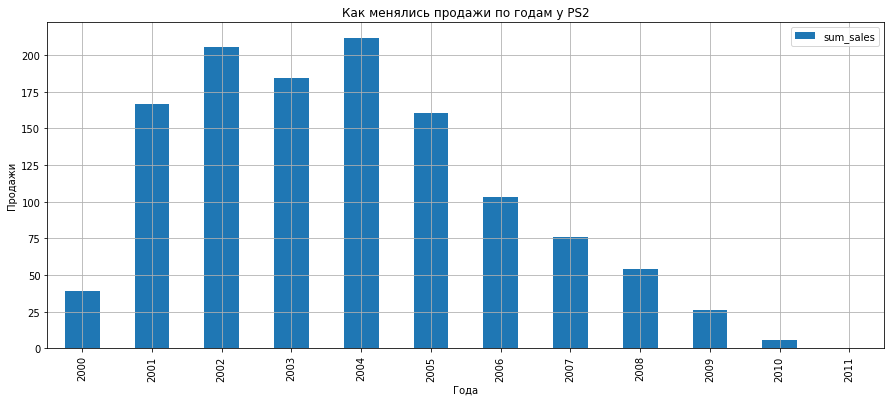

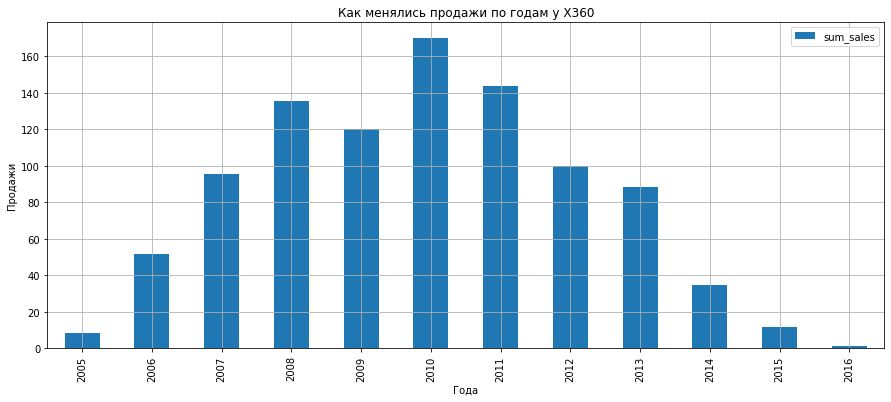

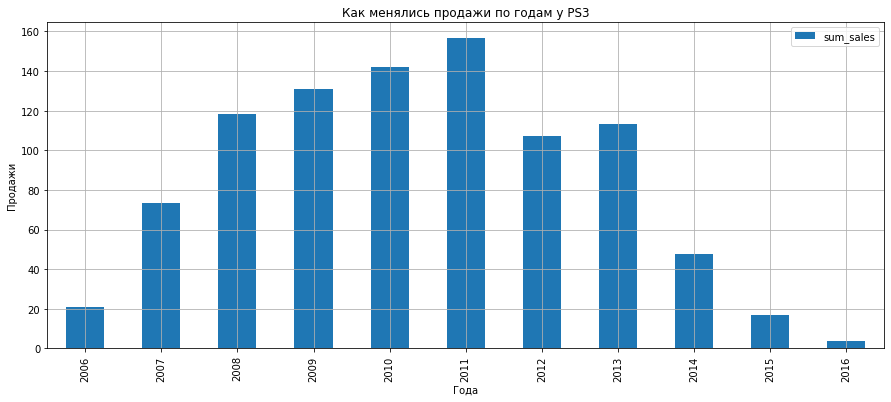

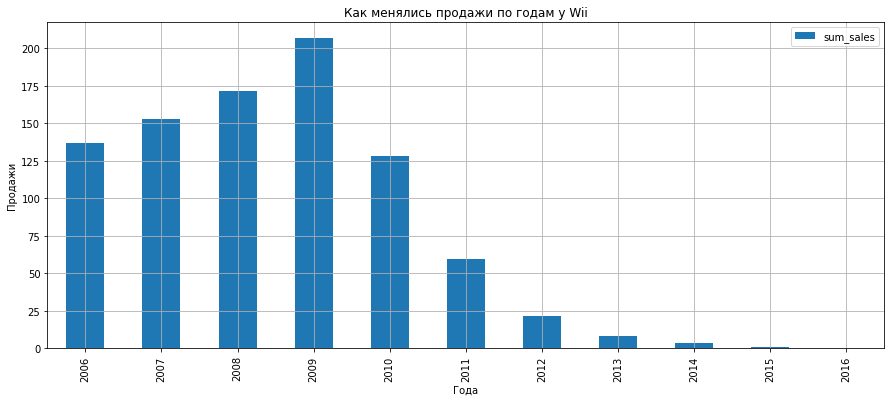

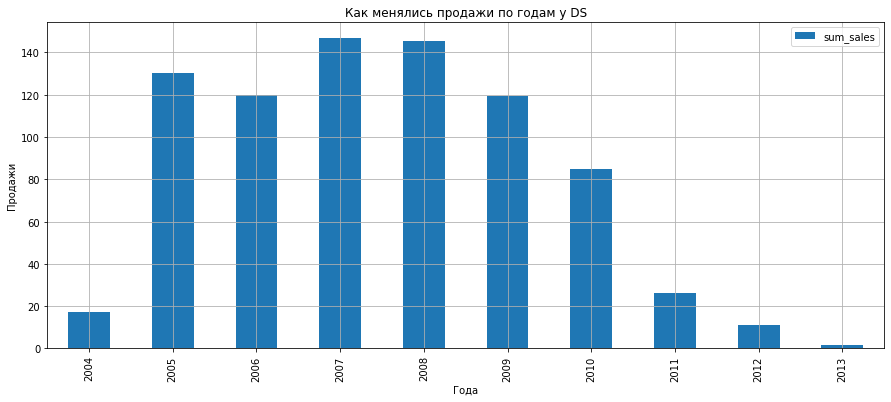

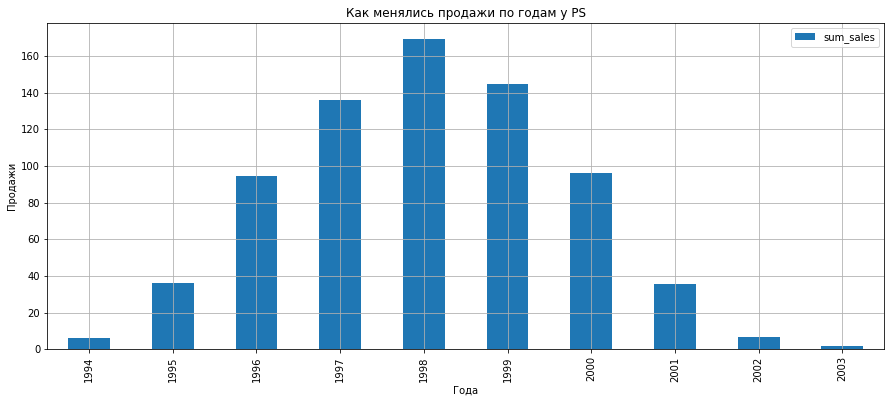

In [22]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for platform in platforms:
    df.loc[df['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot.bar(grid=True, figsize=(15, 6))
    plt.title(f'Как менялись продажи по годам у {platform}')
    plt.xlabel('Года')
    plt.ylabel('Продажи')
    plt.show()

За 7 лет, появляются новые и исчезают старые платформы.

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

В решении задачи использовать года с 2013 по 2016

In [24]:
# Выводим общие суммы продаж по каждой платформе за года, которые шли после 2012 г.
df.loc[df['year_of_release'] > 2012].groupby('platform')['sum_sales'].sum().sort_values()

platform
DS        1.54
PSP       3.50
Wii      13.66
PSV      32.99
PC       39.43
WiiU     64.63
X360    136.80
3DS     143.25
XOne    159.32
PS3     181.43
PS4     314.14
Name: sum_sales, dtype: float64

In [25]:
last_years = df.loc[df['year_of_release'] > 2012]

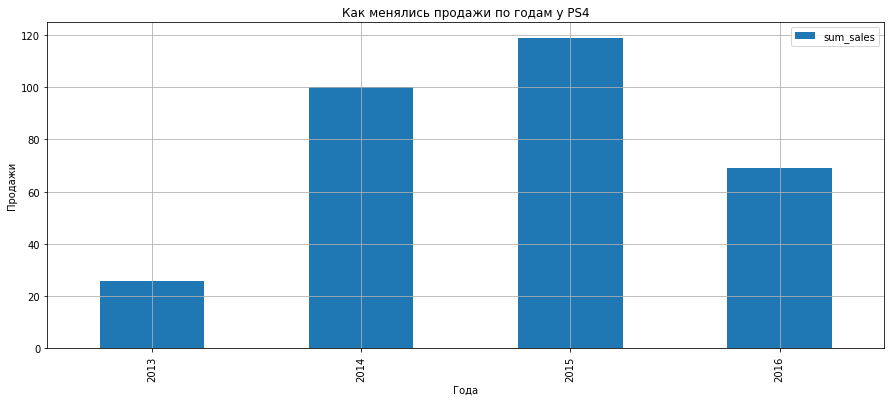

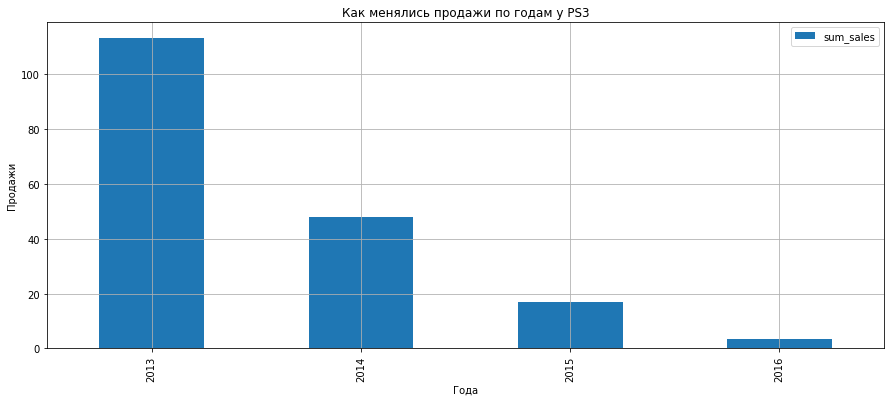

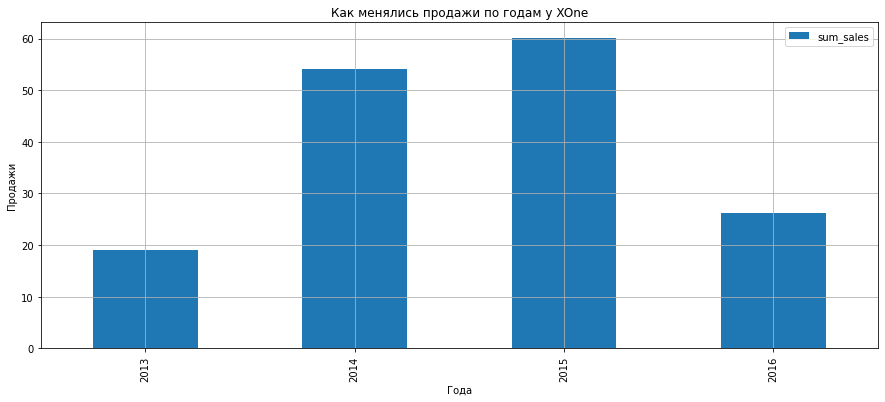

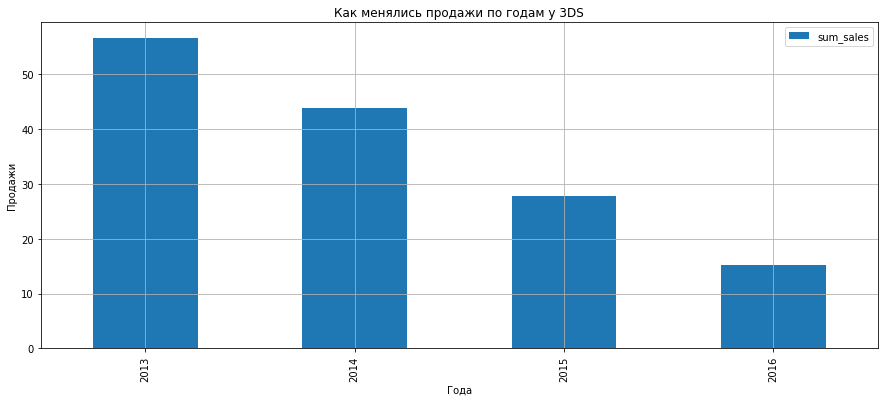

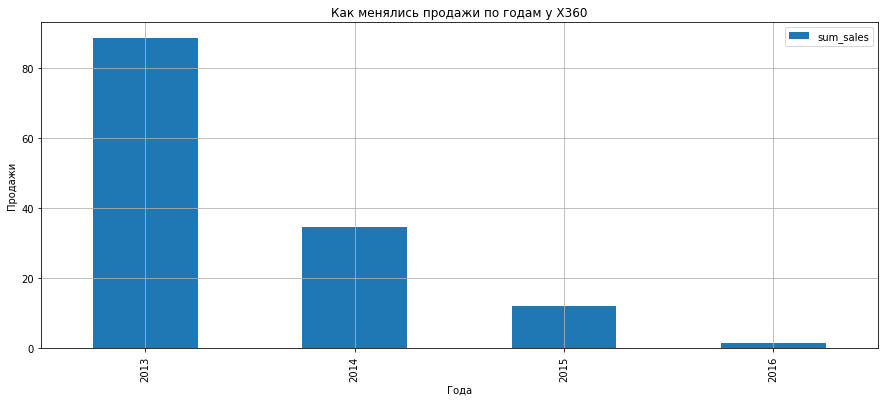

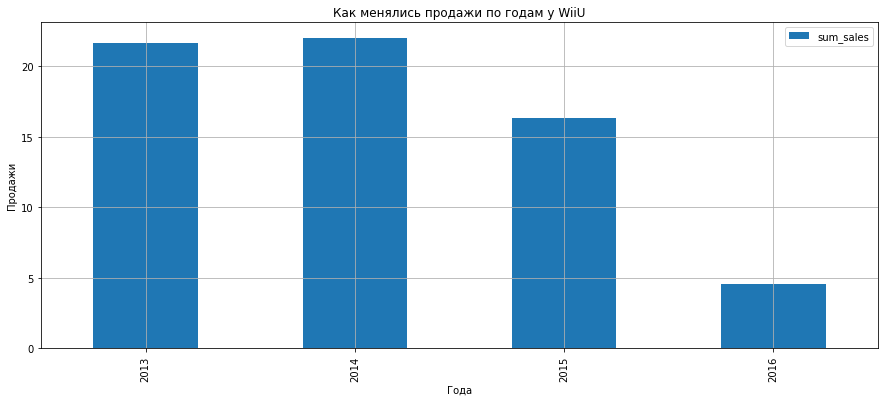

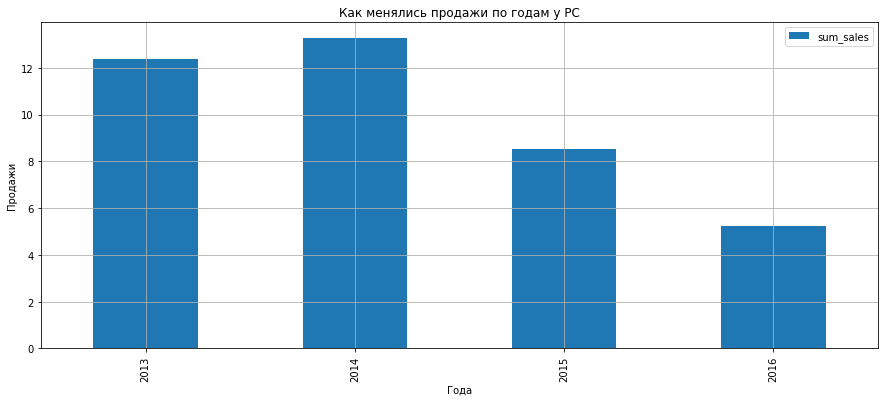

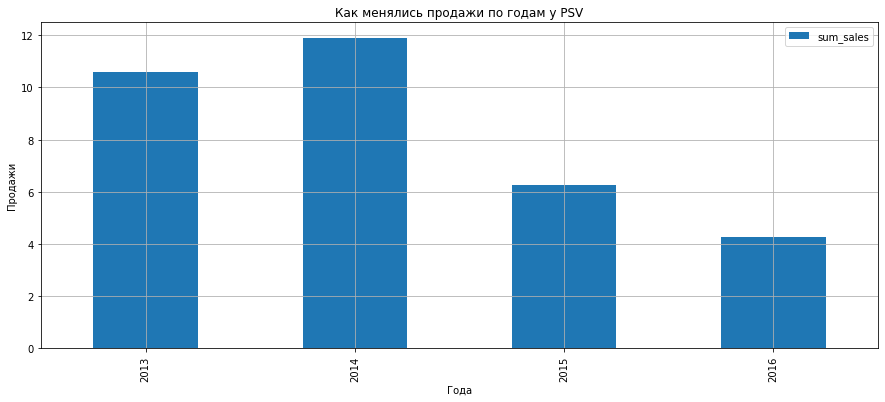

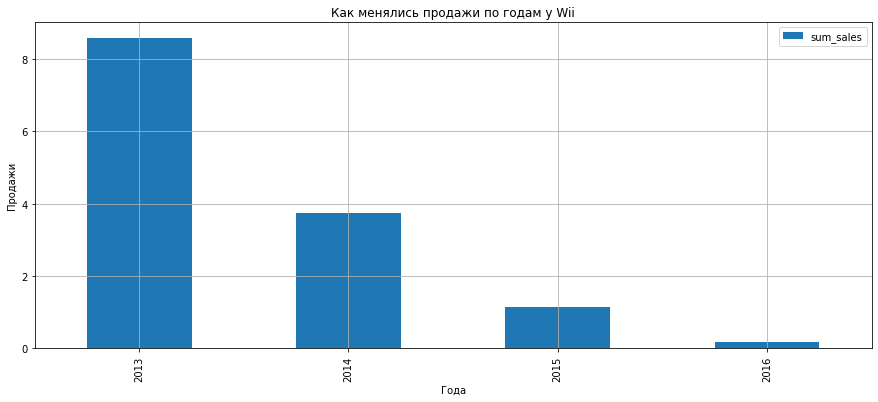

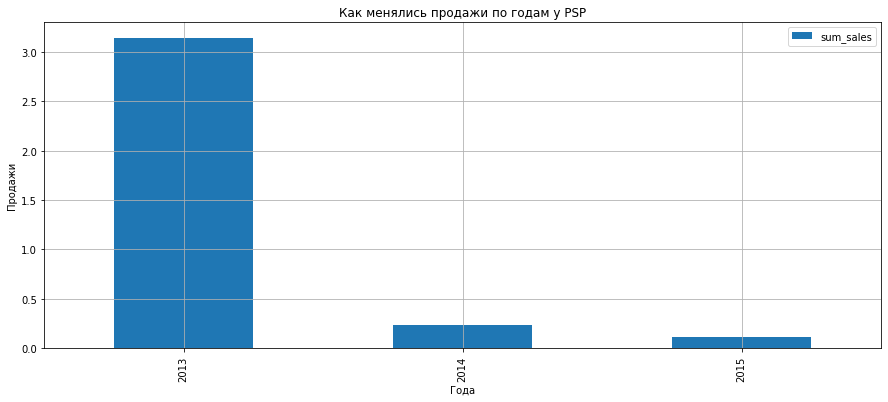

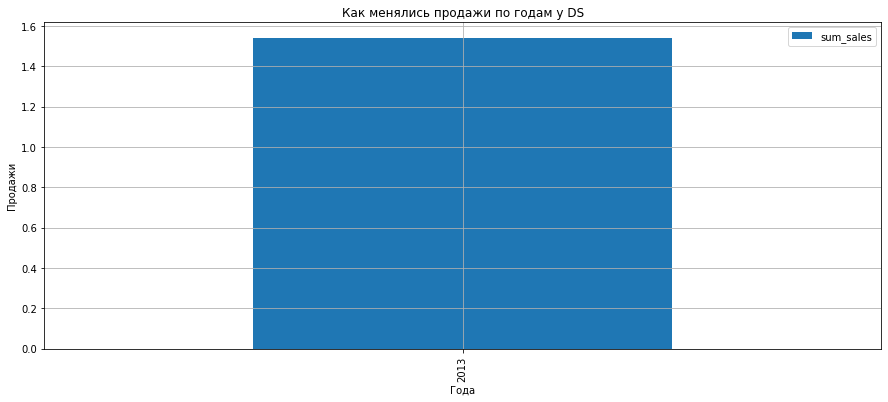

In [26]:
platforms_2 = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

for platform in platforms_2:
    last_years.loc[last_years['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot.bar(grid=True, figsize=(15, 6))
    plt.title(f'Как менялись продажи по годам у {platform}')
    plt.xlabel('Года')
    plt.ylabel('Продажи')
    plt.show()

По продажам лидируют:

1. PS4
2. PS3
3. XOne
4. 3DS
5. X360

У большинства платформ падают продажи. У остальных платформ, нет выраженного роста или падения продаж.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

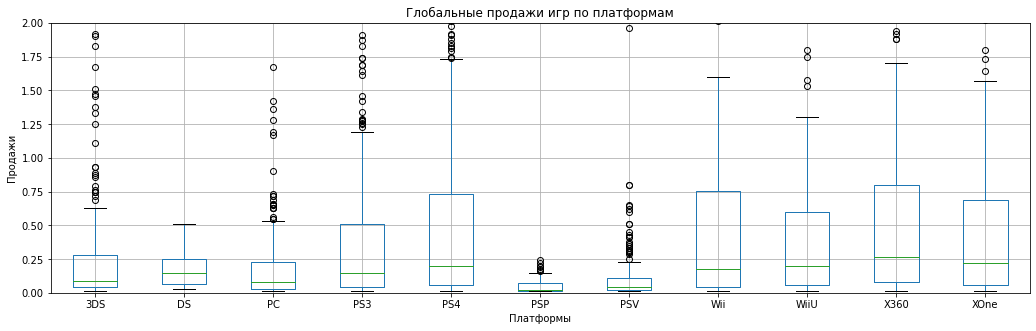

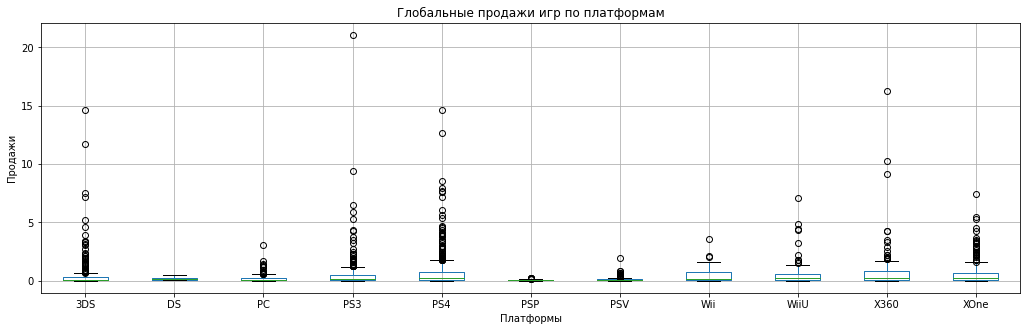

In [27]:
last_years.boxplot(column='sum_sales', by='platform', figsize=(17, 5))
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.ylim(0, 2)
plt.suptitle('')
plt.show()
last_years.boxplot(column='sum_sales', by='platform', figsize=(17, 5))
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.suptitle('')
plt.show()

Самая высокая медиана по количеству продаж наблюдается у X360 и XOne, а самая низкая у PSP и PSV.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)

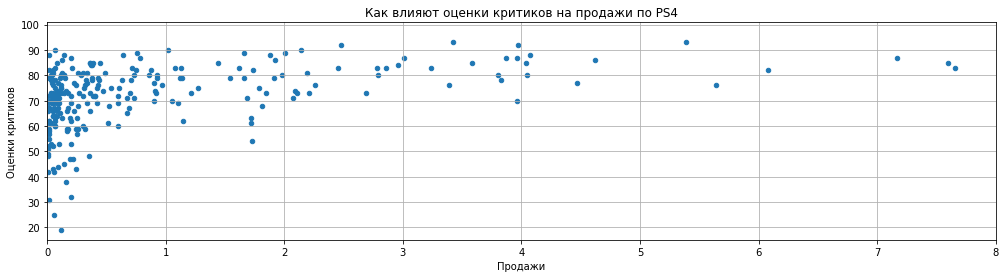

Корреляция составляет: 0.407


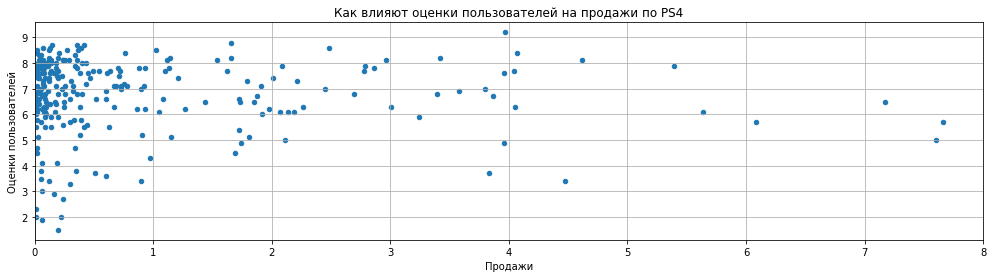

Корреляция составляет: -0.032


In [28]:
last_years_ps4 = last_years.loc[last_years['platform'] == 'PS4']
last_years_ps4.plot(x='sum_sales', y='critic_score', kind='scatter', grid=True, figsize=(17, 4))
plt.title('Как влияют оценки критиков на продажи по PS4')
plt.xlabel('Продажи')
plt.ylabel('Оценки критиков')
plt.xlim(0, 8)
plt.ylim()
plt.show()
print('Корреляция составляет:', round(last_years_ps4['sum_sales'].corr(last_years_ps4['critic_score']),3))
last_years_ps4.plot(x='sum_sales', y='user_score', kind='scatter', grid=True, figsize=(17, 4))
plt.title('Как влияют оценки пользователей на продажи по PS4')
plt.xlabel('Продажи')
plt.ylabel('Оценки пользователей')
plt.xlim(0, 8)
plt.ylim()
plt.show()
print('Корреляция составляет:', round(last_years_ps4['sum_sales'].corr(last_years_ps4['user_score']),3))

Оценки критиков слабо влияют на продажи по PS4, а оценки пользователей влияют очень слабо.

Соотнесите выводы с продажами игр на других платформах.

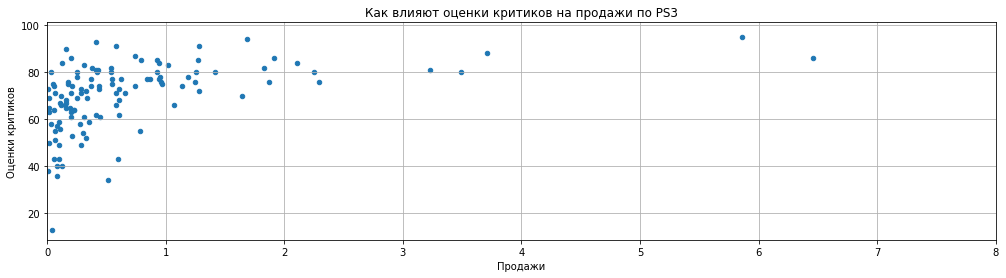

Корреляция составляет: 0.334


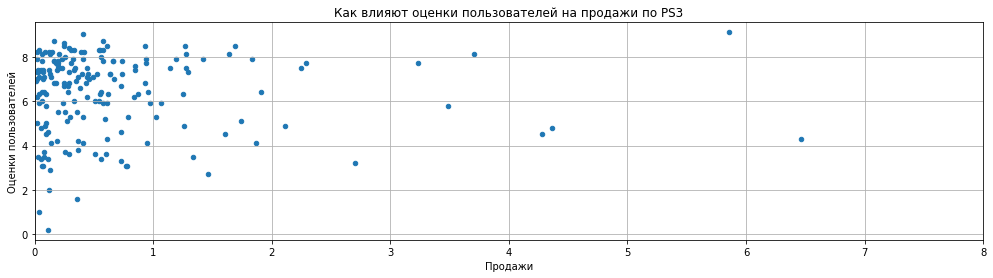

Корреляция составляет: 0.002


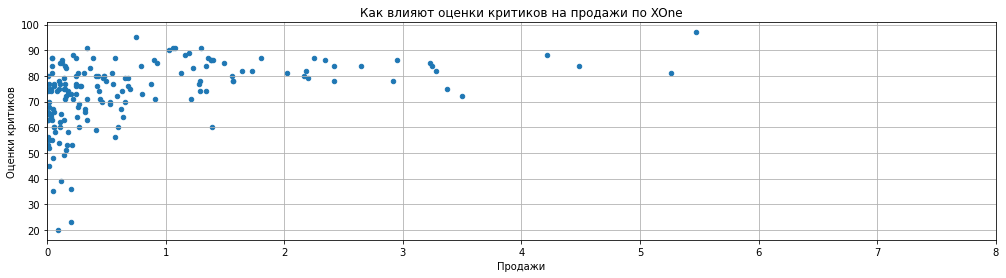

Корреляция составляет: 0.417


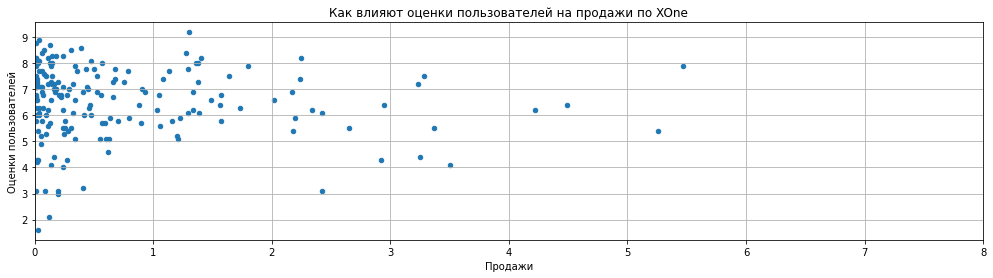

Корреляция составляет: -0.069


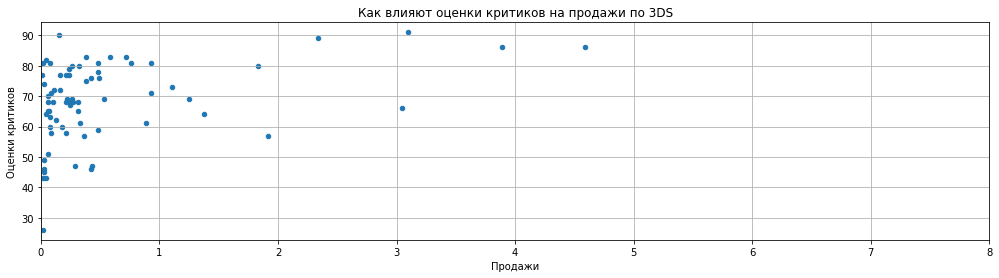

Корреляция составляет: 0.357


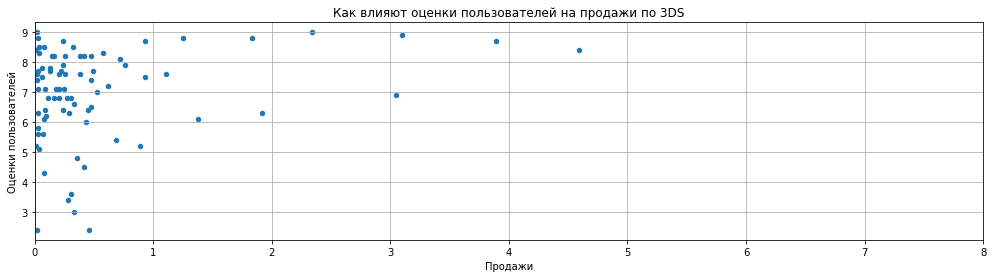

Корреляция составляет: 0.242


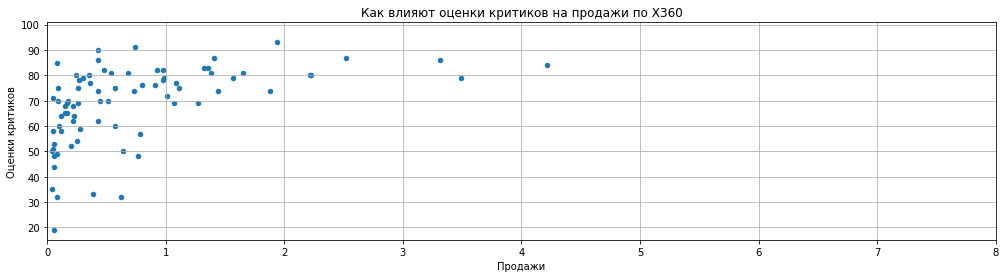

Корреляция составляет: 0.35


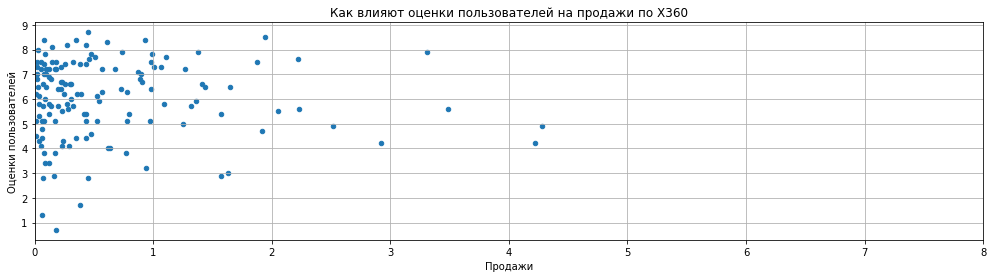

Корреляция составляет: -0.012


In [29]:
platforms_3 = ['PS3', 'XOne', '3DS', 'X360']

for platform in platforms_3:
    platform_data = last_years.loc[last_years['platform'] == platform]
    
    platform_data.plot(x='sum_sales', y='critic_score', kind='scatter', grid=True, figsize=(17, 4))
    plt.title(f'Как влияют оценки критиков на продажи по {platform}')
    plt.xlabel('Продажи')
    plt.ylabel('Оценки критиков')
    plt.xlim(0, 8)
    plt.ylim()
    plt.show()
    print('Корреляция составляет:', round(platform_data['sum_sales'].corr(platform_data['critic_score']), 3))
    
    platform_data.plot(x='sum_sales', y='user_score', kind='scatter', grid=True, figsize=(17, 4))
    plt.title(f'Как влияют оценки пользователей на продажи по {platform}')
    plt.xlabel('Продажи')
    plt.ylabel('Оценки пользователей')
    plt.xlim(0, 8)
    plt.ylim()
    plt.show()
    print('Корреляция составляет:', round(platform_data['sum_sales'].corr(platform_data['user_score']), 3))

По платформам PS3, XOne, 3DS, и X360, оценки критиков слабо влияют на продажи. Оценки пользователей влияют очень слабо.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

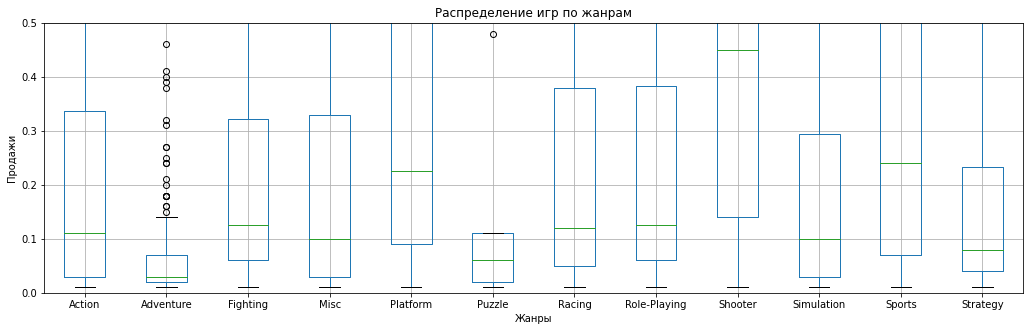

In [30]:
last_years.boxplot(column='sum_sales', by='genre', figsize=(17, 5))
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.ylim(0, 0.5)
plt.suptitle('')
plt.show()

In [31]:
last_years.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)

,sum_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Самые прибыльные жанры, если смотреть по медиане, это:

1. Shooter
2. Sports
3. Platform
4. Role-Playing
5. Fighting

Жанры с высокими и низкими продажами выделяются

**Выводы**

 - Массовый выпуск игр начался в 1991 г. До этого выпуск был незначительным.
 - За 7 лет, появляются новые и исчезают старые платформы.
 - У большинства платформ падают продажи. У остальных платформ, нет выраженного роста или падения продаж.
 - Самая высокая медиана по количеству продаж наблюдается у X360 и XOne, а самая низкая у PSP и PSV.
 - Оценки критиков слабо влияют на продажи по PS4, PS3, XOne, 3DS, и X360, а оценки пользователей влияют очень слабо.

Самые прибыльные жанры, если смотреть по медиане, это:

1. Shooter
2. Sports
3. Platform
4. Role-Playing
5. Fighting

Жанры с высокими и низкими продажами выделяются

По продажам лидируют:

1. PS4
2. PS3
3. XOne
4. 3DS
5. X360

#### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

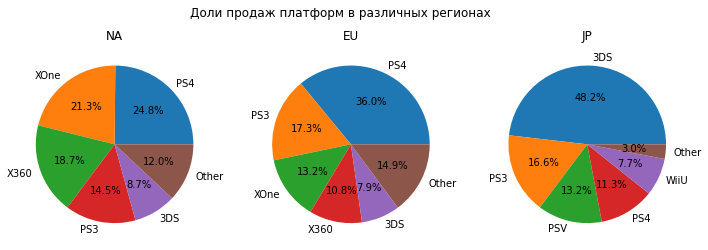

In [32]:
# Определим топ-5 платформ для каждого региона
top_platforms_na = last_years.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = last_years.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = last_years.groupby('platform')['jp_sales'].sum().nlargest(5)

# Создадим категорию "Другие" для всех остальных платформ
other_platforms_na = last_years.groupby('platform')['na_sales'].sum().drop(top_platforms_na.index).sum()
other_platforms_eu = last_years.groupby('platform')['eu_sales'].sum().drop(top_platforms_eu.index).sum()
other_platforms_jp = last_years.groupby('platform')['jp_sales'].sum().drop(top_platforms_jp.index).sum()

# Объединим топ-5 платформ с категорией "Другие"
top_platforms_na['Other'] = other_platforms_na
top_platforms_eu['Other'] = other_platforms_eu
top_platforms_jp['Other'] = other_platforms_jp

# Построим круговые диаграммы для каждого региона
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

top_platforms_na.plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title('NA')
axes[0].set_ylabel('')

top_platforms_eu.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('EU')
axes[1].set_ylabel('')

top_platforms_jp.plot(kind='pie', ax=axes[2], autopct='%1.1f%%')
axes[2].set_title('JP')
axes[2].set_ylabel('')

fig.suptitle('Доли продаж платформ в различных регионах')
plt.show()

В Северной Америке по продажам, самые популярные платформы:

1. PS4 (24.8%)
2. XOne (21.3%)
3. X360 (18.7%)
4. PS3 (14.5%)
5. DS (8.7%)

В Европе по продажам, самые популярные платформы:

1. PS4 (36.0%)
2. PS3 (17.3%)
3. XOne (13.2%)
4. X360 (10.8%)
5. 3DS (7.9%)

В Японии по продажам, самые популярные платформы:

1. 3DS (48.2%)
2. PS3 (16.6%)
3. PSV (13.2%)
4. PS4 (11.3%)
5. WiiU (7.7%)

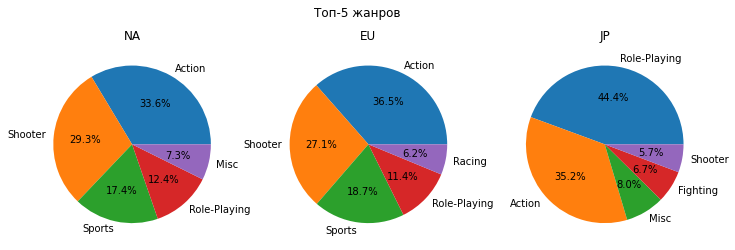

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

last_years.groupby('genre')['na_sales'].sum().nlargest(5).plot.pie(ax=axes[0], autopct='%1.1f%%')
axes[0].set_title('NA')
axes[0].set_ylabel('')

last_years.groupby('genre')['eu_sales'].sum().nlargest(5).plot.pie(ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('EU')
axes[1].set_ylabel('')

last_years.groupby('genre')['jp_sales'].sum().nlargest(5).plot.pie(ax=axes[2], autopct='%1.1f%%')
axes[2].set_title('JP')
axes[2].set_ylabel('')

fig.suptitle('Топ-5 жанров')
plt.show()

В Северной Америке по продажам, самые популярные жанры:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

В Европе по продажам, самые популярные жанры:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

В Японии по продажам, самые популярные платформы:

1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Shooter

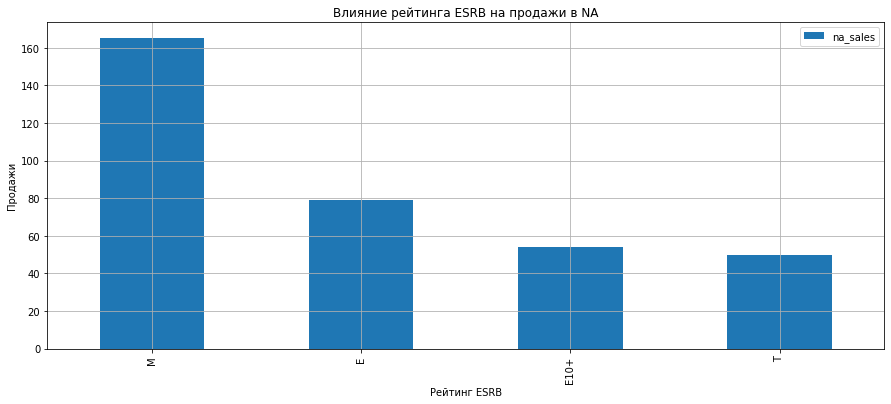

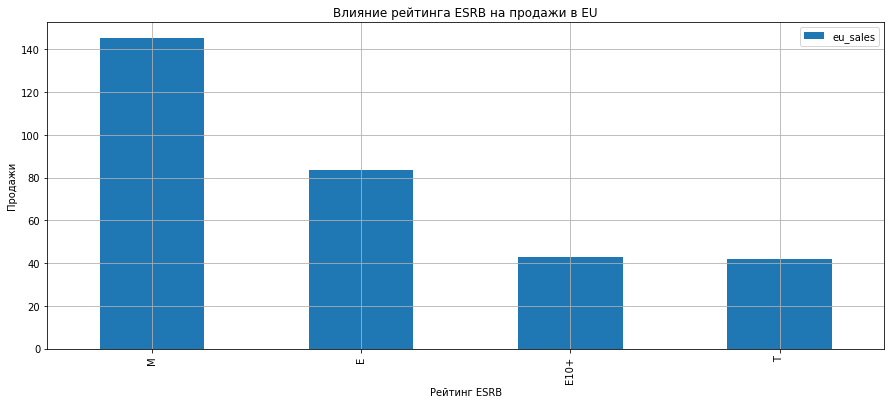

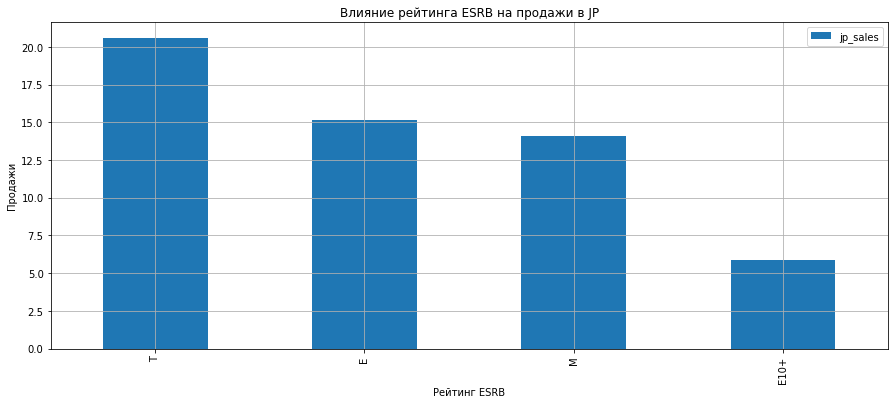

In [34]:
last_years.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot.bar(grid=True, figsize=(15, 6))
plt.title('Влияние рейтинга ESRB на продажи в NA')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()
last_years.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot.bar(grid=True, figsize=(15, 6))
plt.title('Влияние рейтинга ESRB на продажи в EU')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()
last_years.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot.bar(grid=True, figsize=(15, 6))
plt.title('Влияние рейтинга ESRB на продажи в JP')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.show()

Рейтинг ESRB влияет на продажи в отдельном регионе.

В Северной Америке и Европе, по продажам, самые популярные игры (в порядке убывания) c рейтингом:

1. M
2. E
3. E10+
4. T

В Японии по продажам, самые популярные игры (в порядке убывания) c рейтингом:

1. T
2. E
3. M
4. E10+

**Выводы**

В Северной Америке по продажам, самые популярные платформы:

1. PS4 (24.8%)
2. XOne (21.3%)
3. X360 (18.7%)
4. PS3 (14.5%)
5. DS (8.7%)

В Европе по продажам, самые популярные платформы:

1. PS4 (36.0%)
2. PS3 (17.3%)
3. XOne (13.2%)
4. X360 (10.8%)
5. 3DS (7.9%)

В Японии по продажам, самые популярные платформы:

1. 3DS (48.2%)
2. PS3 (16.6%)
3. PSV (13.2%)
4. PS4 (11.3%)
5. WiiU (7.7%)

В Северной Америке по продажам, самые популярные жанры:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

В Европе по продажам, самые популярные жанры:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

В Японии по продажам, самые популярные платформы:

1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Shooter

Рейтинг ESRB влияет на продажи в отдельном регионе.

В Северной Америке и Европе, по продажам, самые популярные игры (в порядке убывания) c рейтингом:

1. M
2. E
3. E10+
4. T

В Японии по продажам, самые популярные игры (в порядке убывания) c рейтингом:

1. T
2. E
3. M
4. E10+

#### Шаг 5. Проверьте гипотезы ###

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 
Задайте самостоятельно пороговое значение alpha.

Поясните:

 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.

 - Нулевая гипотеза (Н0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - Альтернативная гипотеза (Н1): Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Нулевая гипотеза (H0) формулируется как предположение о равенстве или отсутствии различий между двумя или более группами, явлениями или параметрами. В данном случае, нулевая гипотеза звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". То есть, мы предполагаем, что нет значимых различий в средних пользовательских рейтингах между этими двумя платформами.

Альтернативная гипотеза (H1) формулируется как предположение о наличии различий между группами, явлениями или параметрами. В данном случае, альтернативная гипотеза звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC не равны". То есть, мы предполагаем, что существуют значимые различия в средних пользовательских рейтингах между этими двумя платформами.

In [36]:
# Удаляем строки с пропущенными значениями в колонке с отзывами пользователей
last_years_test = last_years.dropna(subset=['user_score'])

In [38]:
score_XOne = last_years_test.loc[last_years['platform'] == 'XOne']['user_score']
score_PC = last_years_test.loc[last_years['platform'] == 'PC']['user_score']

alpha = 0.05

results = st.ttest_ind(score_XOne, score_PC, alternative='two-sided')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


In [39]:
print(score_PC.mean())
print(score_XOne.mean())

6.2696774193548395
6.521428571428572


На основе проведенного теста гипотезы не было обнаружено статистически значимого различия в средних пользовательских рейтингах платформ Xbox One и PC. Таким образом, нет оснований отвергать нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

 - Нулевая гипотеза (Н0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
 - Альтернативная гипотеза (Н1): Средние пользовательские рейтинги жанров Action и Sports не равны.

Нулевая гипотеза (H0) формулируется как предположение о равенстве или отсутствии различий между двумя или более группами, явлениями или параметрами. В данном случае, нулевая гипотеза звучит так: "Средние пользовательские рейтинги жанров Action и Sports одинаковые". То есть, мы предполагаем, что нет значимых различий в средних пользовательских рейтингах между этими двумя жанрами.

Альтернативная гипотеза (H1) формулируется как предположение о наличии различий между группами, явлениями или параметрами. В данном случае, альтернативная гипотеза звучит так: "Средние пользовательские рейтинги жанров Action и Sports не равны". То есть, мы предполагаем, что существуют значимые различия в средних пользовательских рейтингах между этими двумя жанрами.

In [40]:
score_Action = last_years_test.loc[last_years['genre'] == 'Action']['user_score']
score_Sports = last_years_test.loc[last_years['genre'] == 'Sports']['user_score']

alpha = 0.05

results = st.ttest_ind(score_Action, score_Sports, alternative='two-sided')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [41]:
print(score_Action.mean())
print(score_Sports.mean())

6.837532133676092
5.238124999999999


На основе проведенного теста гипотезы было обнаружено статистически значимое различие в средних пользовательских рейтингах жанров Action и Sports. Таким образом, есть основание отвергать нулевую гипотезу о равенстве средних пользовательских рейтингах жанров Action и Sports.

t-критерий используется для сравнения средних двух групп данных, когда распределение выборок близко к нормальному или когда объем выборок достаточно большой. Я предполагаю, что распределение пользовательского рейтинга близко к нормальному, и поэтому t-критерий является подходящим выбором для данного теста.

## Общий вывод

**Шаг 1. Загрузка данных**

В датасете 16715 строк. В некоторых столбцах имеется неверный тип данных.

**Шаг 2. Подготовка данных**

1. Приведены названия столбцов к нижнему регистру. 
2. Преобразованы данные в столбце year_of_release, в нужный тип, т.к. год не может выражаться в виде вещественного числа.
3. Удалены те строки, в которых имелись пропущенные значения в столбце year_of_release. Это было допустимо, т.к. процентное соотношение пропущенных значений в этом столбце составляло всего 1,6%.
4. В столбце user_score тип данных не был изменён, т.к. было бы неправильным удалить 40% пропущенных значений. Заполнения пропущенных значений не было, т.к. в этом не было необходимости.
5. Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.
6. Заменяем значение 'tbd' на пропуски, для возможности дальнейшего анализа.

Пропуски могли появиться, потому что:

1. Некоторые данные могли быть просто не заполнены.
2. Ошибки или проблемы в сборе или записи данных могли привести к пропускам информации.

**Шаг 3. Исследовательский анализ данных**

 - Массовый выпуск игр начался в 1991 г. До этого выпуск был незначительным.
 - За 7 лет, появляются новые и исчезают старые платформы.
 - У большинства платформ падают продажи. У остальных платформ, нет выраженного роста или падения продаж.
 - Самая высокая медиана по количеству продаж наблюдается у X360 и XOne, а самая низкая у PSP и PSV.
 - Оценки критиков слабо влияют на продажи по PS4, PS3, XOne, 3DS, и X360, а оценки пользователей влияют очень слабо.

Самые прибыльные жанры, если смотреть по медиане, это:

1. Shooter
2. Sports
3. Platform
4. Role-Playing
5. Fighting

Жанры с высокими и низкими продажами выделяются

По продажам лидируют:

1. PS4
2. PS3
3. XOne
4. 3DS
5. X360

**Шаг 4. Составьте портрет пользователя каждого региона**

В Северной Америке по продажам, самые популярные платформы:

1. PS4 (24.8%)
2. XOne (21.3%)
3. X360 (18.7%)
4. PS3 (14.5%)
5. DS (8.7%)

В Европе по продажам, самые популярные платформы:

1. PS4 (36.0%)
2. PS3 (17.3%)
3. XOne (13.2%)
4. X360 (10.8%)
5. 3DS (7.9%)

В Японии по продажам, самые популярные платформы:

1. 3DS (48.2%)
2. PS3 (16.6%)
3. PSV (13.2%)
4. PS4 (11.3%)
5. WiiU (7.7%)

В Северной Америке по продажам, самые популярные жанры:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

В Европе по продажам, самые популярные жанры:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

В Японии по продажам, самые популярные платформы:

1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Shooter

Рейтинг ESRB влияет на продажи в отдельном регионе.

В Северной Америке и Европе, по продажам, самые популярные игры (в порядке убывания) c рейтингом:

1. M
2. E
3. E10+
4. T

В Японии по продажам, самые популярные игры (в порядке убывания) c рейтингом:

1. T
2. E
3. M
4. E10+

**Шаг 5. Проверьте гипотезы**

В следствии проведенных тестов гипотез:

1.	Не было обнаружено статистически значимого различия в средних пользовательских рейтингах платформ Xbox One и PC. Таким образом, нет оснований отвергать нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.
2.	Было обнаружено статистически значимое различие в средних пользовательских рейтингах жанров Action и Sports. Таким образом, есть основание отвергать нулевую гипотезу о равенстве средних пользовательских рейтингах жанров Action и Sports.

t-критерий используется для сравнения средних двух групп данных, когда распределение выборок близко к нормальному или когда объем выборок достаточно большой. Я предполагаю, что распределение пользовательского рейтинга близко к нормальному, и поэтому t-критерий является подходящим выбором для данного теста.

**Итоговый вывод**

В Северной Америке и Европе, бюджет стоит потратить на игры на платформе PS4 в жанре Action, с рейтингом M. В Японии, бюджет стоит потратить на игры на платформе 3DS в жанре Role-Playing, с рейтингом Т.